<a href="https://colab.research.google.com/github/ranjita-raj9/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Risk Prediction

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts.
### The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.



# Data Description
## Demographic:


* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)






# Behavioral:


*   is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)




# Medical( history):


  • BP Meds: whether or not the patient was on blood pressure medication(Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)
  



##10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -dependent variable

# Mounting google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Importing important libraries

In [ ]:
# importing pandas for data reading and manipulations
# numpy for linear algebra
# seaborn and matplotlib for visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.utils import resample

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
     
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv")

In [ ]:
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#Summary of Numerical Features
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.shape

(3390, 17)



##    From the data set we can see that there are 3390 rows and 17 columns.






In [ ]:
#checking for duplicate values
len(df[df.duplicated()])

0

### There are no duplicate values

# Checking for NULL Values

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Null values are present in education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose columns.

In [ ]:
#Calculating the percentage of null values
c=df.isnull().sum()/df['id'].count() * 100
c

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

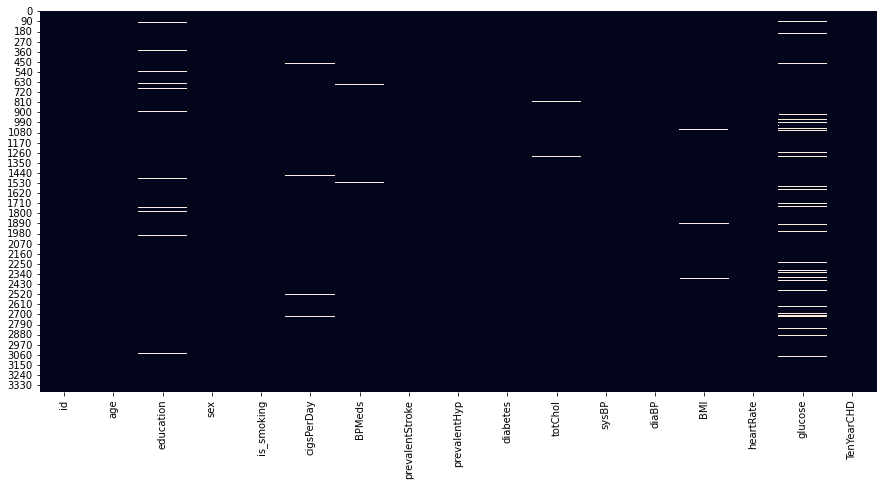

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  df[col] = df[col].fillna(df[col].median())

In [ ]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Exploratory Data Analysis

### Distribution of the dependent variable

In [ ]:
# Let us check the majority and minority set of the target variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

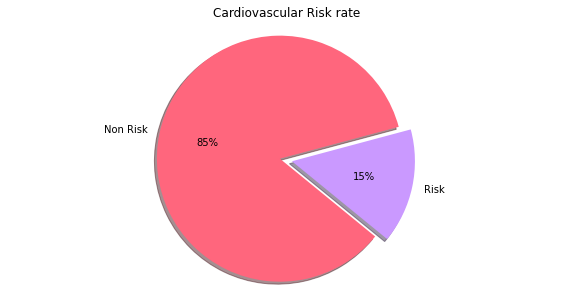

In [ ]:
# Let us plot the majority and minority set of the target variable
labels = 'Non Risk',"Risk"
my_colors = ['#ff667d','#ca99ff']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()



*   from the pie chart we can see that 85% people comes under Non risk category. 
*   And 15% people comes under Risk category. 



# Distribution of the continuous independent variables

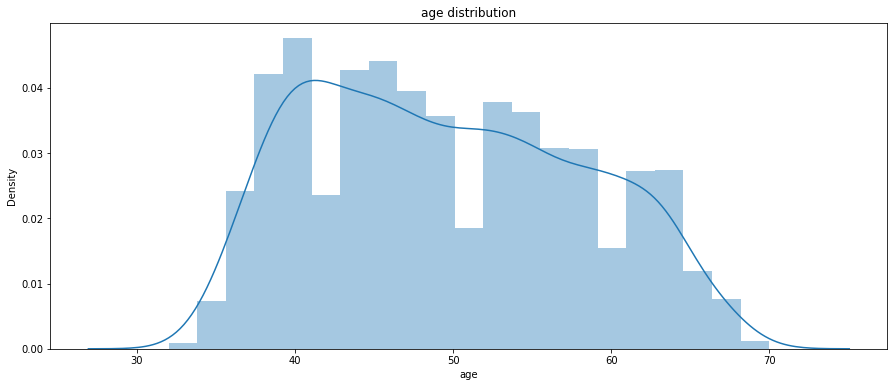

In [ ]:
# Distribution of values of numerical features
# distribution of age
plt.figure(figsize=(15,6))
sns.distplot(df['age'])
plt.title('age distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['age'].skew()))
print("Kurtosis: {}".format(df['age'].kurt()))

Skew: 0.2257958756715891
Kurtosis: -1.0048018900322173


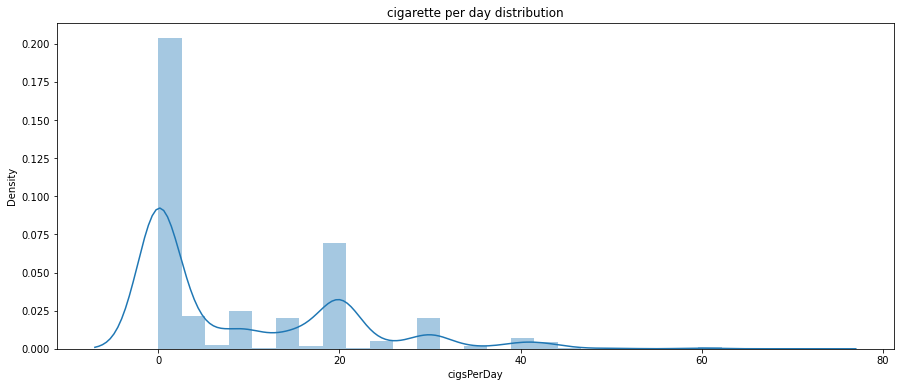

In [ ]:
# distribution of cigsPerDay
plt.figure(figsize=(15,6))
sns.distplot(df['cigsPerDay'])
plt.title('cigarette per day distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['cigsPerDay'].skew()))
print("Kurtosis: {}".format(df['cigsPerDay'].kurt()))

Skew: 1.2230053709053774
Kurtosis: 0.9755291252788516


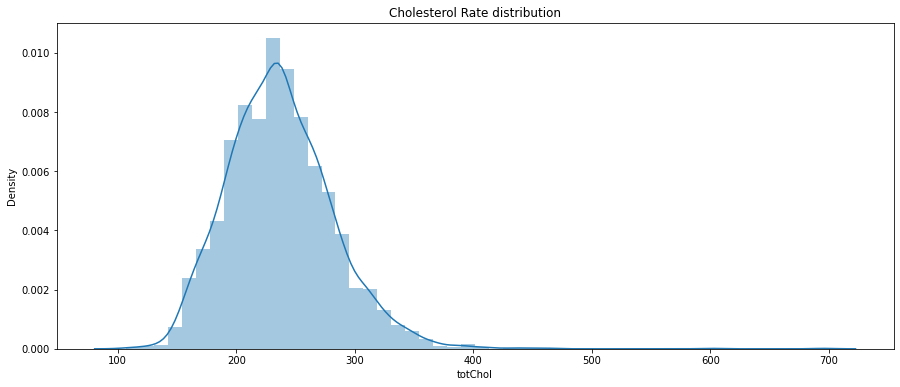

In [ ]:
# distribution of TotalChol
plt.figure(figsize=(15,6))
sns.distplot(df['totChol'])
plt.title('Cholesterol Rate distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['totChol'].skew()))
print("Kurtosis: {}".format(df['totChol'].kurt()))

Skew: 0.9406357047700903
Kurtosis: 4.781321712560631


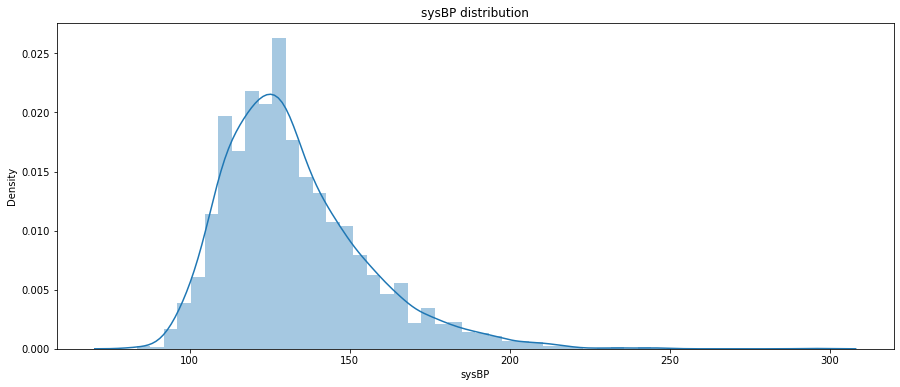

In [ ]:
# distribution of sysBP
plt.figure(figsize=(15,6))
sns.distplot(df['sysBP'])
plt.title('sysBP distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['sysBP'].skew()))
print("Kurtosis: {}".format(df['sysBP'].kurt()))

Skew: 1.1758367309612197
Kurtosis: 2.3659224984054052


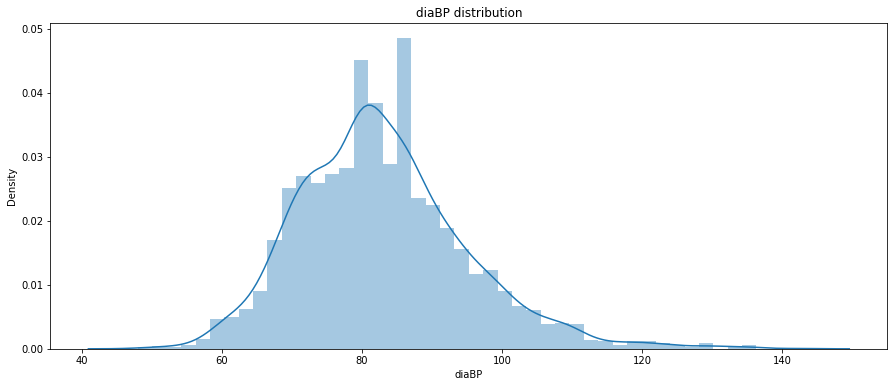

In [ ]:
# distribution of diaBP
plt.figure(figsize=(15,6))
sns.distplot(df['diaBP'])
plt.title('diaBP distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['diaBP'].skew()))
print("Kurtosis: {}".format(df['diaBP'].kurt()))

Skew: 0.7181726683579213
Kurtosis: 1.2739949650851914


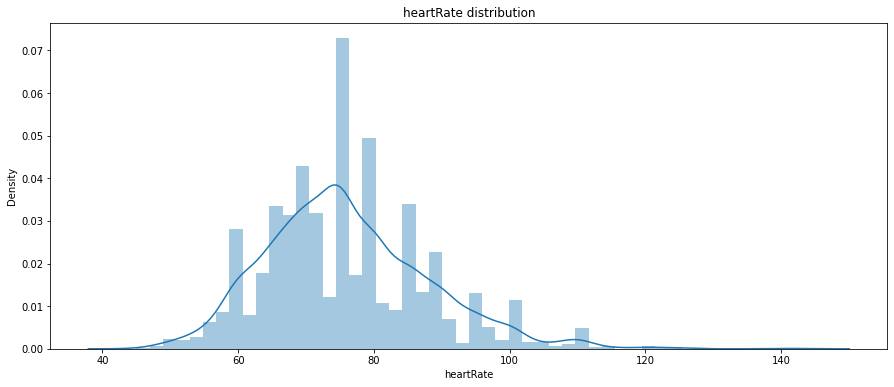

In [ ]:
# distribution of heart rate
plt.figure(figsize=(15,6))
sns.distplot(df['heartRate'])
plt.title('heartRate distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['heartRate'].skew()))
print("Kurtosis: {}".format(df['heartRate'].kurt()))

Skew: 0.6764897223370003
Kurtosis: 0.9796435954513374


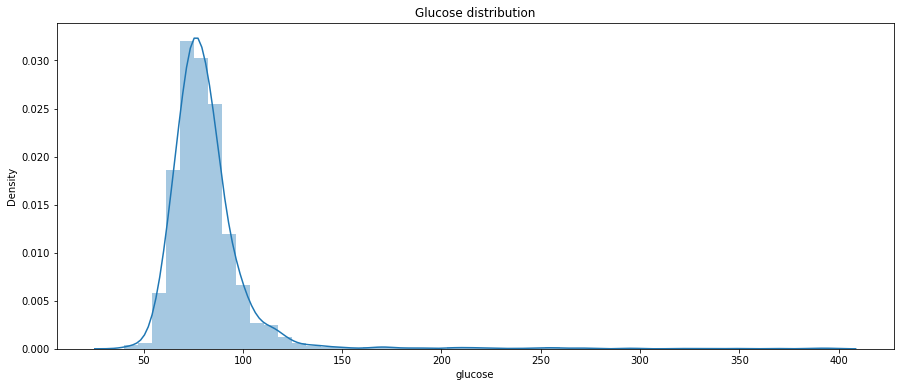

In [ ]:
# distribution of glucose
plt.figure(figsize=(15,6))
sns.distplot(df['glucose'])
plt.title('Glucose distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['glucose'].skew()))
print("Kurtosis: {}".format(df['glucose'].kurt()))

Skew: 6.1443896544049394
Kurtosis: 57.356963153228115


### **Most of the numerical features are skewed and contains outliers.**

# Distribution of the discrete independent variables

In [ ]:
# creating a list that contains all the categorical features
categorical_columns = [i for i in df.columns if len(df[i].unique())<10]

categorical_columns.remove('TenYearCHD') 
# dropping the target variable i.e. TenYearCHD
print(list(categorical_columns))
# creating a list that contains all the numerical features
numerical_columns  = [i for i in df.columns if len(df[i].unique())>25]
print(list(numerical_columns))
     

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
# Dropping the id columnn as it is useless 
df.drop(columns=['id'], inplace=True)

In [ ]:
for feature in categorical_columns:
    print(feature,':')
    print(df[feature].value_counts())
    print("................")

education :
1.0    1391
2.0    1077
3.0     549
4.0     373
Name: education, dtype: int64
................
sex :
F    1923
M    1467
Name: sex, dtype: int64
................
is_smoking :
NO     1703
YES    1687
Name: is_smoking, dtype: int64
................
BPMeds :
0.0    3290
1.0     100
Name: BPMeds, dtype: int64
................
prevalentStroke :
0    3368
1      22
Name: prevalentStroke, dtype: int64
................
prevalentHyp :
0    2321
1    1069
Name: prevalentHyp, dtype: int64
................
diabetes :
0    3303
1      87
Name: diabetes, dtype: int64
................


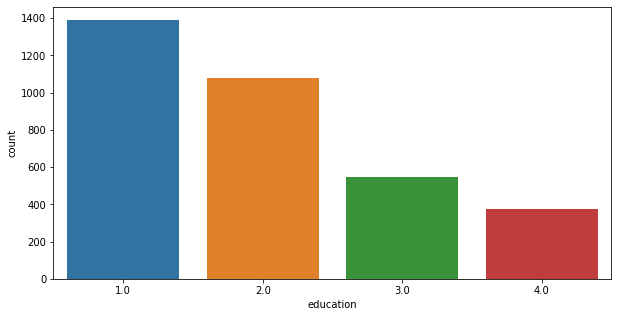

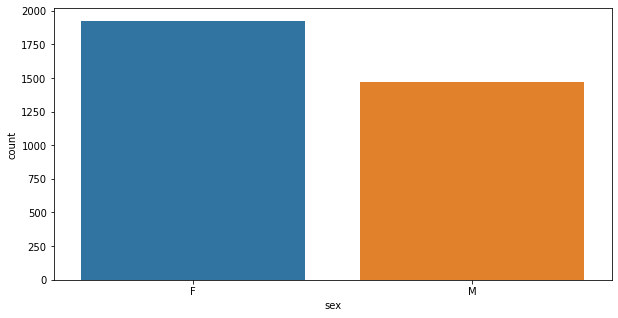

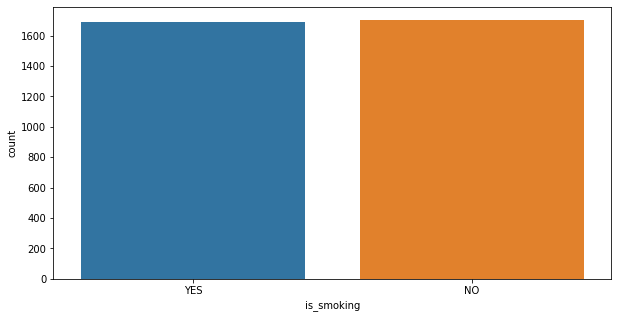

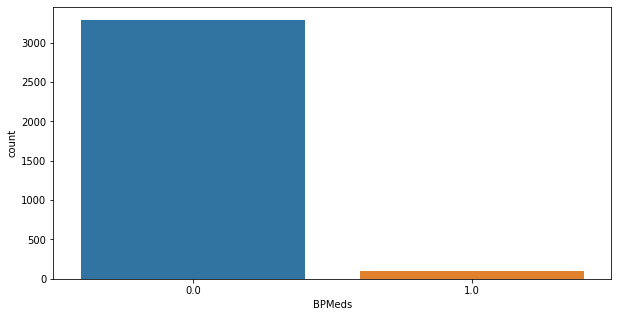

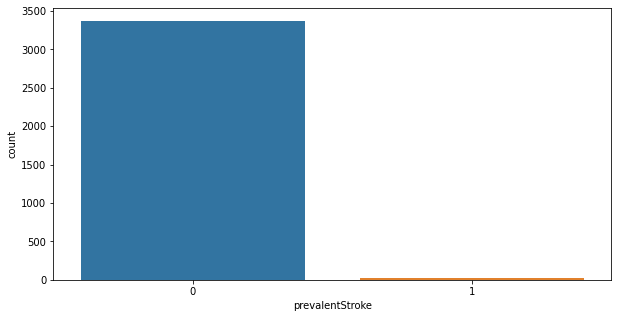

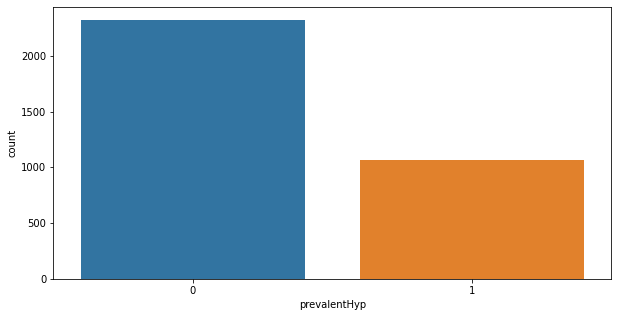

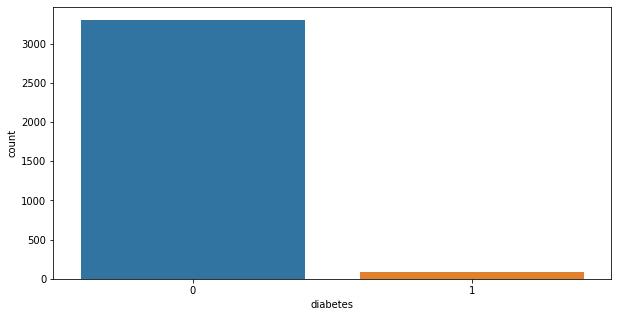

In [ ]:
categorical_columns
for col in categorical_columns:
  plt.figure(figsize = (10,5))
  sns.countplot(df[col])
  plt.show()



*   Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.
*   Female numbers are more than Male numbers.

*   Smokers and Non Smokers numbers are almost equals.
*   Number of people who were not on BPmeds, who did not had a stroke in past, and who are dont have diastolic blood pressure are very less.





# Analysing Outliers

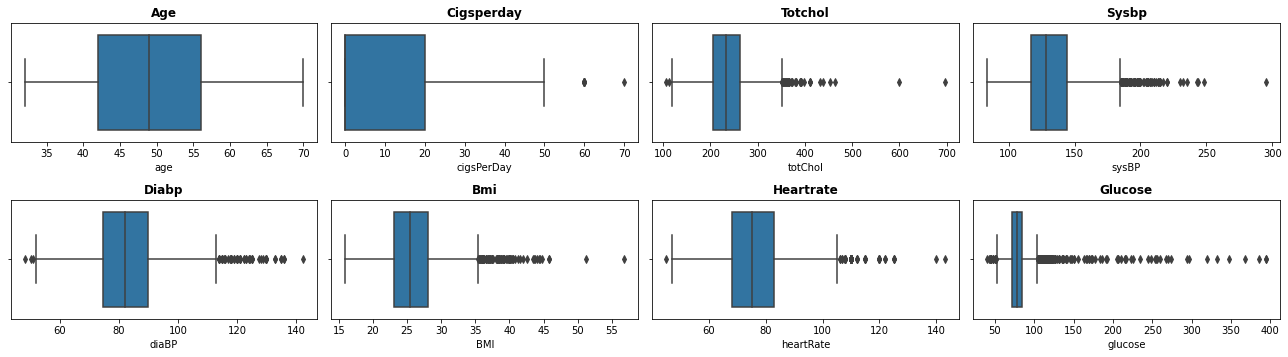

In [ ]:
plt.figure(figsize=(18,12))
for n,column in enumerate(numerical_columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

# Removing Outliers

In [ ]:
# Removing outliers by standard methods and Plotting graphs:

df1 = df.copy()
for col in numerical_columns:


  # Using IQR method to define the range of inliners:

  q1, q3, median = df1[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)
  

  # Replacing Outliers with median value:

  df1[col] = np.where(df1[col] > upper_limit, median,np.where(
                         df1[col] < lower_limit,median,df1[col]))
     

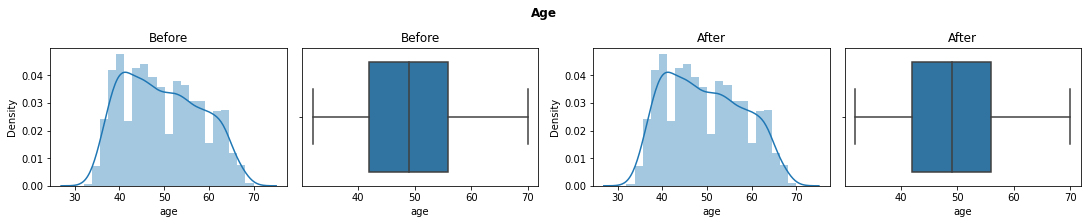

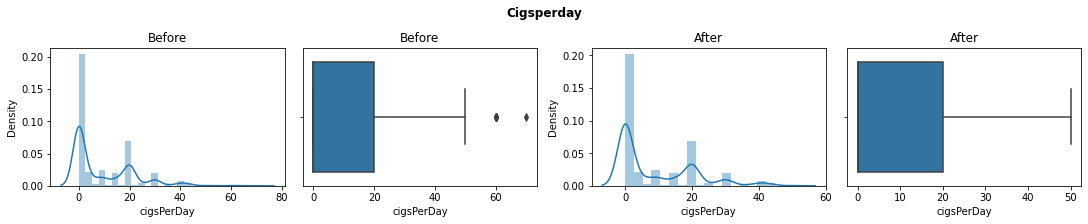

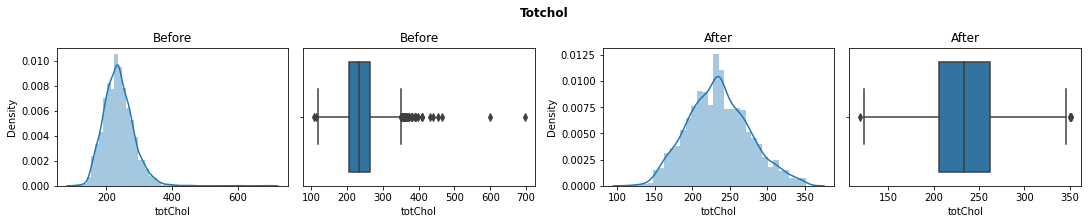

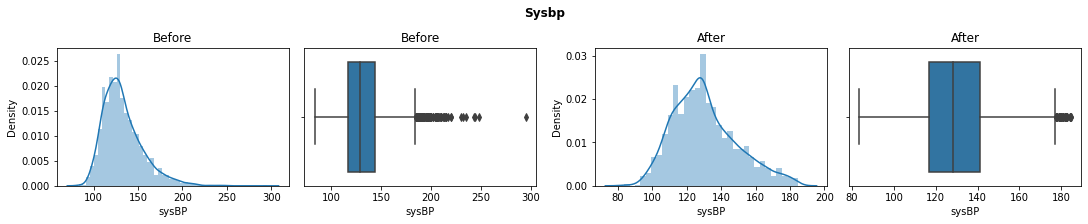

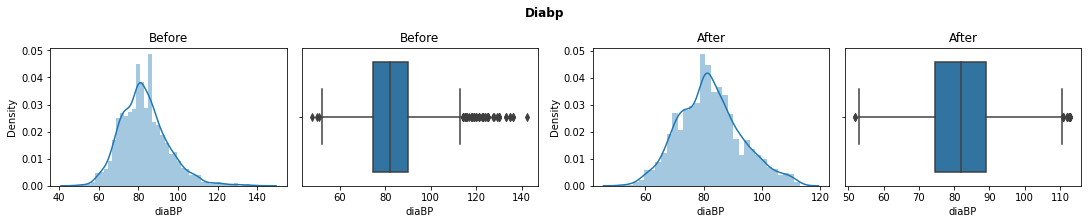

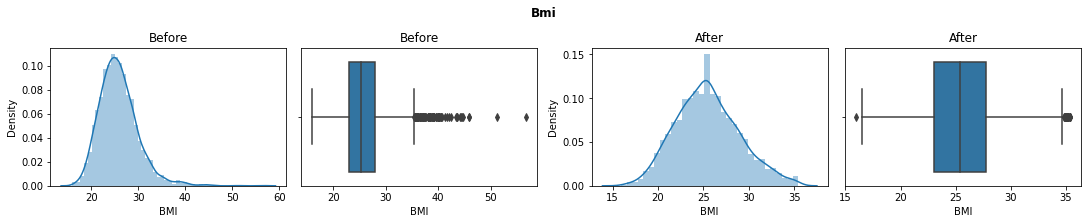

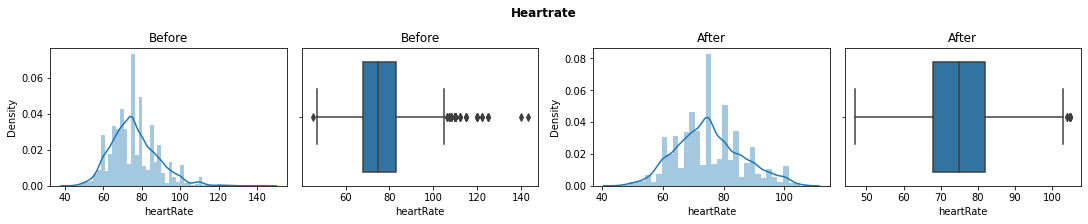

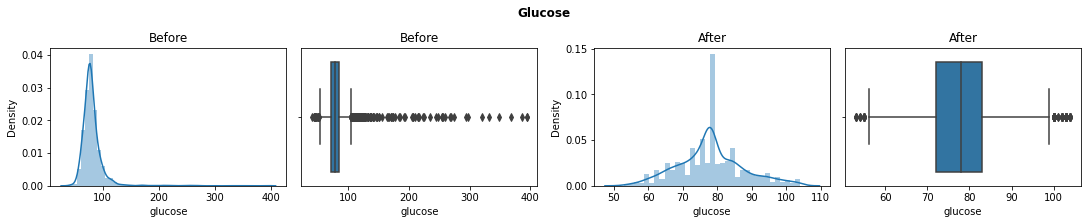

In [ ]:
# Before treating outliers :

for col in numerical_columns:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")


  # After treating outliers :
  
  sns.distplot(df1[col], ax=ax[2]).set(title="After")
  sns.boxplot(df1[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

## Cleaning and Manipulating Datasets

In [ ]:
# Checking unique value with their counts in categorical features
for col in ['sex', 'is_smoking']:
  print(df[col].value_counts(),'\n')

F    1923
M    1467
Name: sex, dtype: int64 

NO     1703
YES    1687
Name: is_smoking, dtype: int64 



In [ ]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df = df.replace(encoder)

In [ ]:
# Checking Whether all features are numeric or not
len(df.columns) == len(df.describe().columns)


True

In [ ]:
df.tail(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,0,0,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


# Univariate Analysis

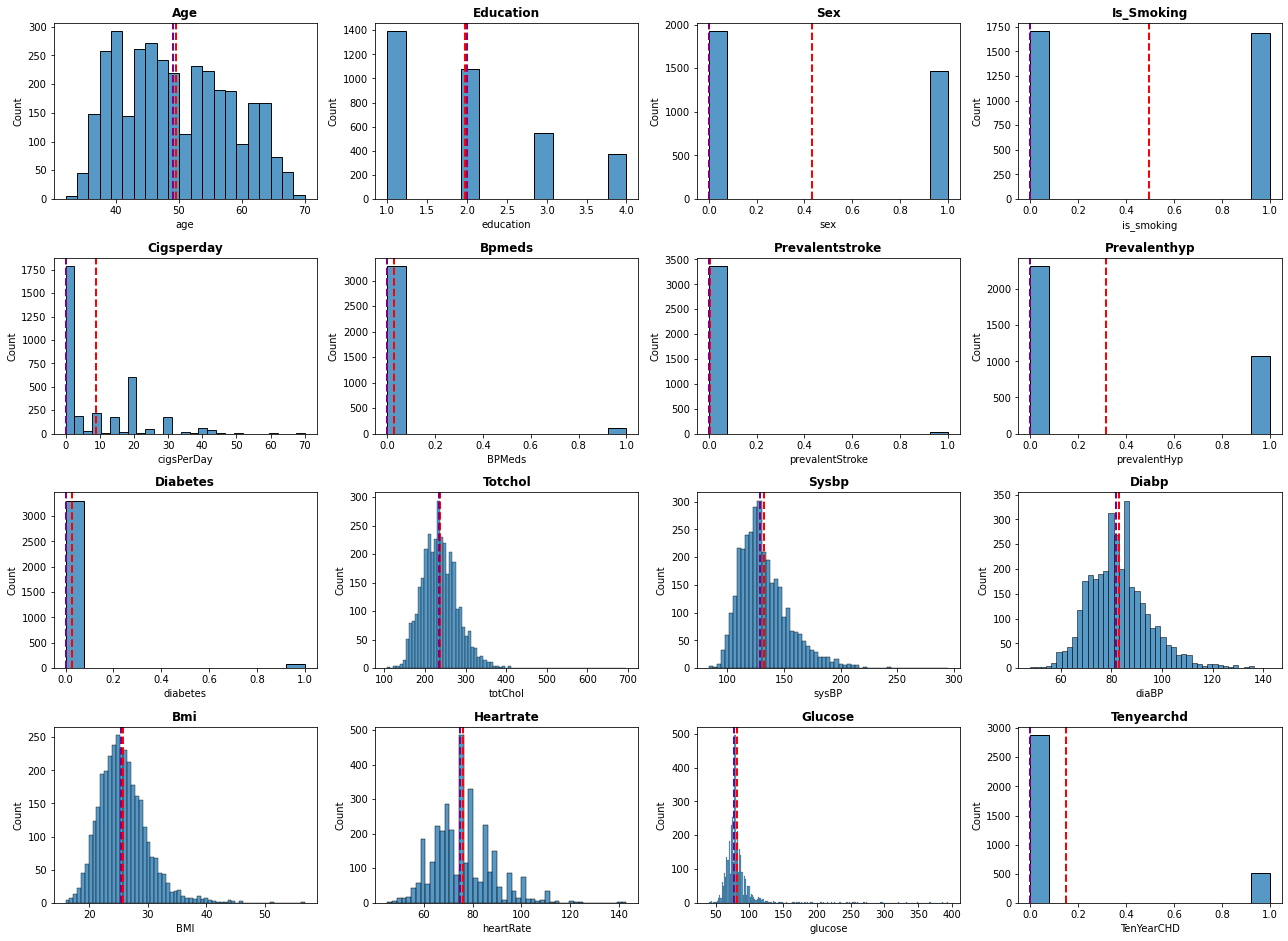

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='purple', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

# Bivariate Analysis

In [ ]:
independent_variable = df.columns

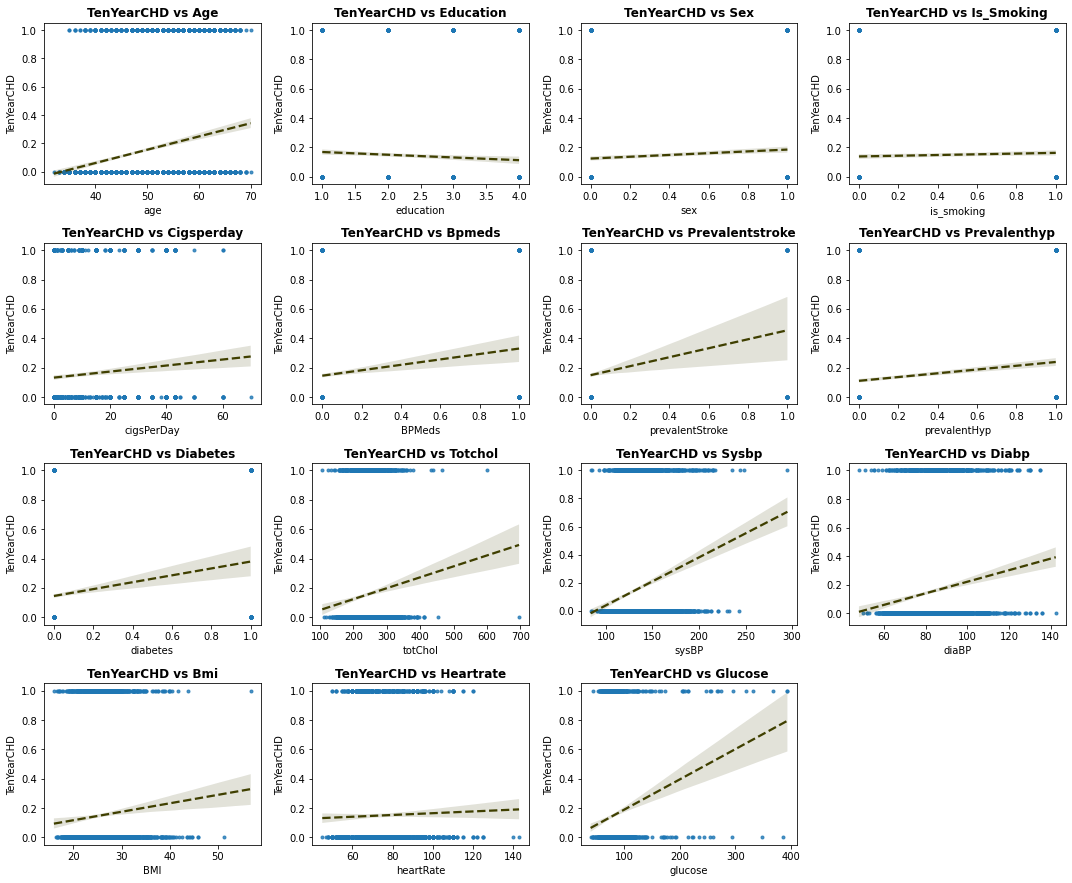

In [ ]:
# Checking Linearity
variables = [i for i in independent_variable if i not in ['TenYearCHD']]

plt.figure(figsize = (15,15))
for index, column in enumerate(variables) :
  plt.subplot(5,4,index+1)
  sns.regplot(data = df, x = column, y = 'TenYearCHD', marker = '.' , line_kws = {'color' : '#3f3f00', 'linestyle':'--'})
  plt.title(f'TenYearCHD vs {column.title()}', weight = 'bold')
  plt.tight_layout()
plt.show();

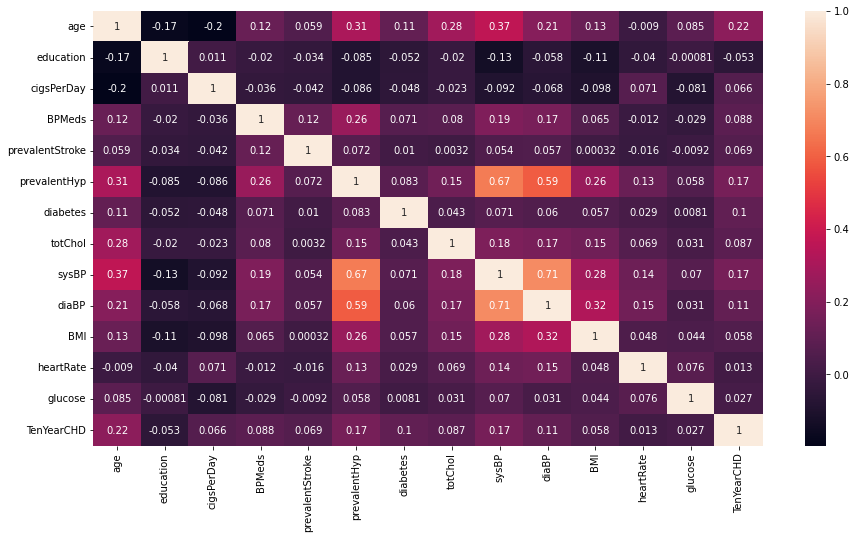

In [ ]:
# Checking multicollinearity 
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True,)

## Age & Sex v/s Risk

Text(0.5, 1.0, 'Male')

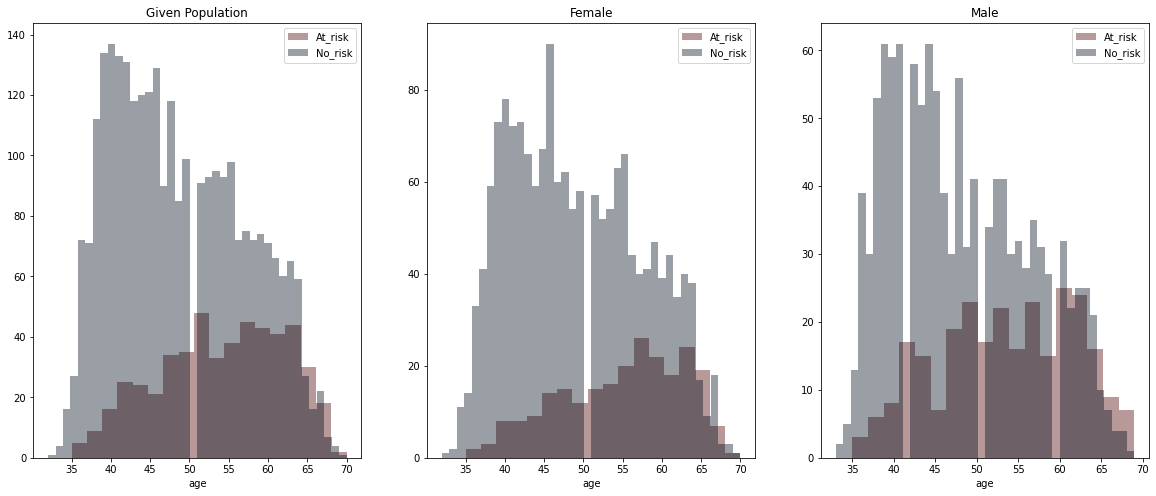

In [ ]:
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax= sns.distplot(df[df['TenYearCHD']==1].age,bins=18,label='At_risk',ax=axes[0],color='#4d0000',kde=False)
ax= sns.distplot(df[df['TenYearCHD']==0].age,bins=40,label='No_risk',ax=axes[0],color='#000f1e',kde=False)
ax.legend()
ax.set_title("Given Population")
women= df[df['sex']==0]
men= df[df['sex']==1]
ax= sns.distplot(women[women['TenYearCHD']==1].age,bins=18,label='At_risk',ax=axes[1],color='#4d0000',kde=False)
ax= sns.distplot(women[women['TenYearCHD']==0].age,bins=40,label='No_risk',ax=axes[1],color='#000f1e',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['TenYearCHD']==1].age,bins=18,label='At_risk',ax=axes[2],color='#4d0000',kde=False)
ax= sns.distplot(men[men['TenYearCHD']==0].age,bins=40,label='No_risk',ax=axes[2],color='#000f1e',kde=False)
ax.legend()
ax.set_title("Male")




*  Both women and men lying in Age group of 50 and above having high risk. 
*   women above 55 years are usually at risk.


*   Men above 45 years are usually at risk
*   Men are more likely to have heart disease than women.





## Number of male and female smokers

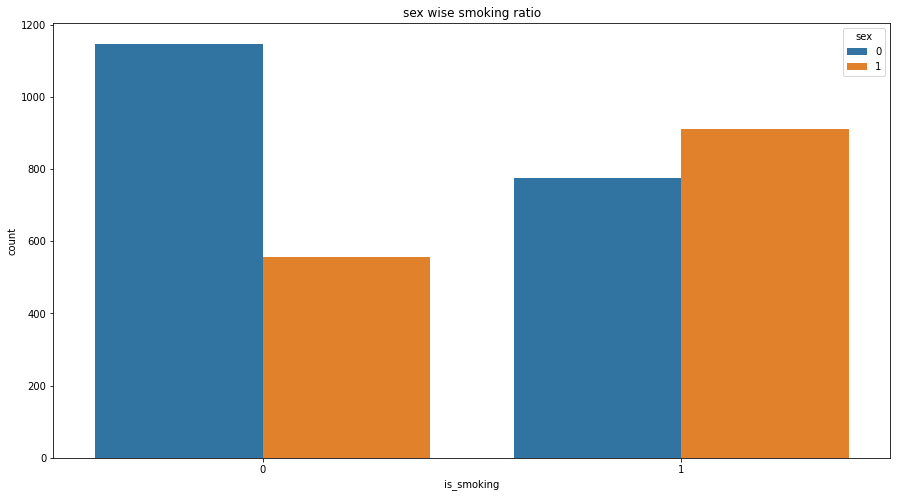

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='is_smoking', hue = 'sex', data=df)
plt.title('sex wise smoking ratio')

plt.show()

**Number of male smoker is higher than female smoker.**

## Age wise smoking ratio

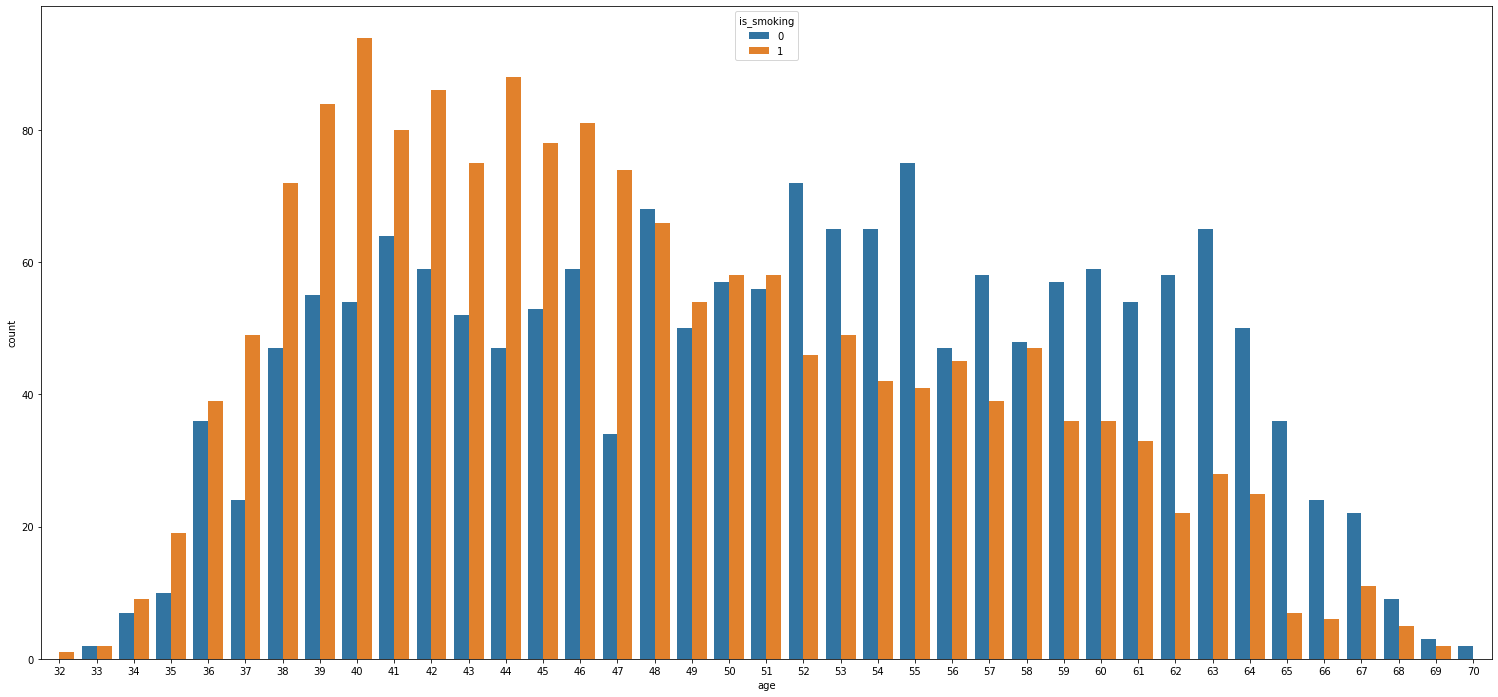

In [ ]:
plt.figure(figsize=(26,12), facecolor='w')
sns.countplot(x="age",data=df,hue="is_smoking")

**Young and middle aged people smokes most.**

## CigsPerDay & Sex v/s Risk

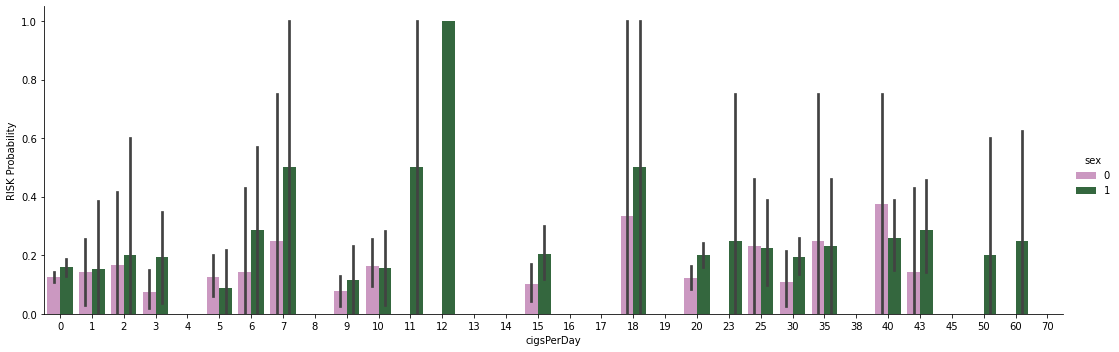

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].astype(int)
g=sns.factorplot('cigsPerDay','TenYearCHD',kind='bar',
                    data=df,hue='sex',aspect=3, palette="cubehelix_r")
g=g.set_ylabels("RISK Probability")

**Male have more tendency of developing risk than females, since smoking levels of male is higher than that of female smokers.**

Person who had a stroke earlier more prone to CHD?

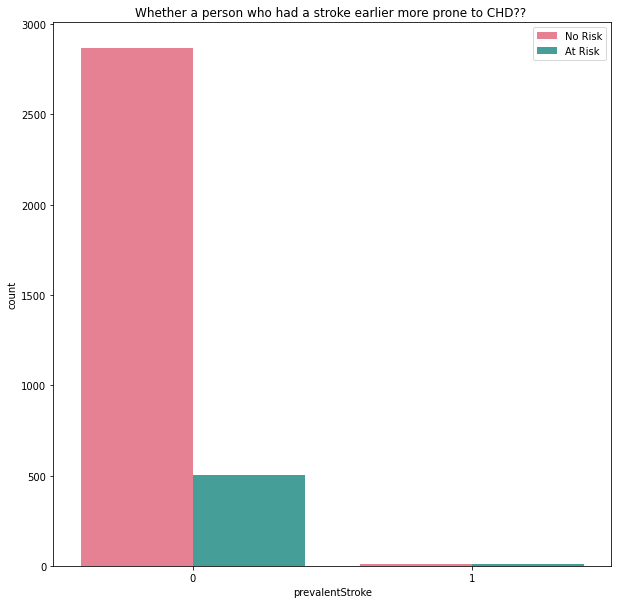

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'],palette="husl")
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

**person who previously had a heart stroke are more at risk to CHD than those who did not.**

# Data Splitting, Training & Imbalanced data sets

## Analysing & Handling Imbalance Data


Text(0.5, 1.0, 'Imbalanced dataset ')

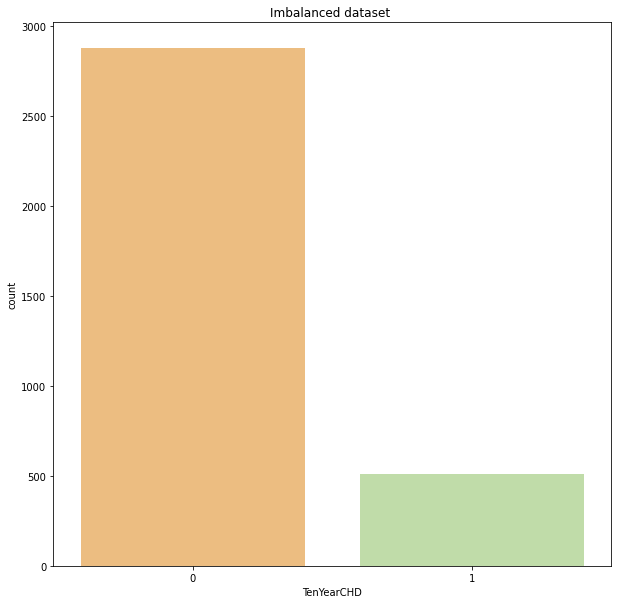

In [ ]:
# Checking the labeled data distribution 
plt.figure(figsize = (10,10))
sns.countplot(data=df1, x='TenYearCHD',palette='Spectral')
plt.title('Imbalanced dataset ')

From the graph we can see that data set is imbalanced.so first we have to balanced the data set.

In [ ]:
df1['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
#creating a new copy of the data set
new_df = df.copy()

In [ ]:
# Let us now split
X = new_df.drop(['TenYearCHD'], axis=1)
y = new_df['TenYearCHD']

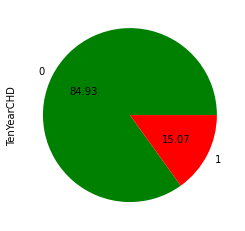

In [ ]:
y.value_counts().plot.pie(autopct='%.2f',colors = ['green','red'])

In [ ]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape :', len(new_df))
print('Resampled dataset shape :', len(y_smote))


Original dataset shape : 3390
Resampled dataset shape : 5758


In [ ]:
X_resampled= pd.DataFrame(x_smote)
y_resampled= pd.DataFrame(y_smote)

In [ ]:
y_resampled.value_counts()
     

TenYearCHD
0             2879
1             2879
dtype: int64

**Now the data set is balanced.**

In [ ]:
new_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X_resampled)
X = pd.DataFrame(X,columns= (new_df.drop(['TenYearCHD'], axis=1).columns))
     

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_resampled , test_size=0.3,stratify = y_resampled, random_state=0)

# Model building and Training

# Logistic Regression